## Filters:

Filters can be used in:

    1. Time domain (1d)
    2. Space domain (2d)
    3. Frequency domain

__How to apply a filter?__ A filter is applied using the convolution operation (*)

---

### 1 Dimensional filters:

__Concepts:__ 
- Input signal (x); 
- Output filter (y); 
- Filter (h);

In one dimension can have filters in one dimension, for example [-1, 2, -1] where 2 is the zero element: [h(-1), h(0), h(1)]

__Mathematically:__
<center>$y = x * h \rightarrow y[n] = \sum\limits_{k=-\infty}^{\infty}{x[k].h[n-h]}$</center>

<img src="Assets/1dconv.gif" fonte=https://e2eml.school/convolution_one_d.html>

---

### 2 Dimensional filters:

Two dimensions the filters are grids, or matrices but they work in the same way as one dimension filters

__Concepts:__ 
- Input image (J(x,y)); 
- Output filter (I(x,y)); 
- Filter (h(s,t));

__Mathematically:__

<center>$J(x,y) = \sum\limits_{s=-a}^{a}\sum\limits_{t=-b}^{b}{h(a,b).I(x+a,y+b)]}$</center>

__Generalization:__ 

$$\begin{bmatrix} 
    h(-1,-1) & h(-1, 0) & h(-1, 1) \\ 
    h( 0,-1) & h( 0, 0) & h( 0, 1) \\ 
    h( 1,-1) & h( 1, 0) & h( 1, 1)
  \end{bmatrix}$$

<img src="Assets/2dconv.gif" fonte=https://commons.wikimedia.org/wiki/File:2D_Convolution_Animation.gif>

__Types of 2d filters:__

1. Smoothing Filter (Low pass / moving average)
    - _Idea_: Replaces each pixel by a weighted average of its neighbors
    - _Pro_: Remove / Reduces noise
    - _Con_: Removes detail (blur image)
    
    For a n by n filter: 
$
\begin{bmatrix}
\frac{1}{n} & \cdots &
\frac{1}{n} \\
\vdots & \ddots & \vdots \\
\frac{1}{n} & \cdots &
\frac{1}{n}
\end{bmatrix}
=
\frac{1}{n}
\begin{bmatrix}
1 & \cdots & 1 \\
\vdots & \ddots & \vdots \\
1 & \cdots & 1
\end{bmatrix}
$

# CODE IMPLEMENTATION

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Paths and parameters
imgs_dir = Path(Path.cwd().parent, "imgs")
lena_path = imgs_dir.joinpath("Lena.jpg")

In [3]:
# Functions
def add_noise(img, type='gaussian', channels=3, mean=0.1, std_dev=0.0001):
    out_img = np.array (img/255, dtype=float)
    
    if type == 'gaussian':
        noise = np.random.normal(mean, std_dev, img.shape)
        out_img += noise
    
    return out_img*255

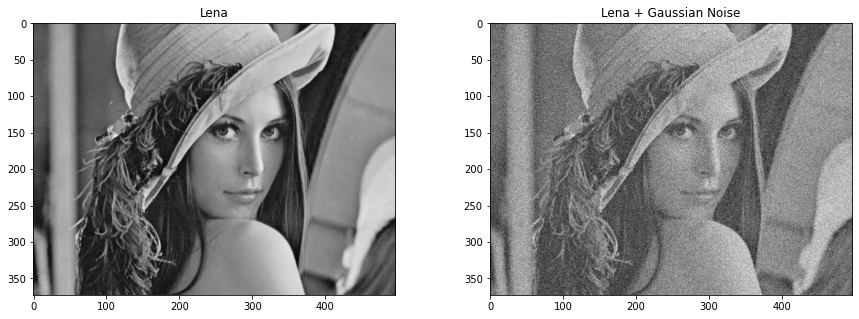

In [4]:
# Loading images #

# Original
lena_img = cv2.imread(str(lena_path), 0) # load image in BRG
#lena_img = cv2.cvtColor(lena_img, cv2.COLOR_BGR2RGB) # Convert to rgb
plt.figure(1,figsize=(15,5))
plt.subplot(121)
plt.title("Lena")
plt.imshow(lena_img, cmap='gray')

# Noisy
lena_img_noisy = add_noise(lena_img, 'gaussian', mean=0, std_dev=0.1)
plt.subplot(122)
plt.title("Lena + Gaussian Noise")
plt.imshow(lena_img_noisy, cmap='gray')
plt.show()